In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [7]:
# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784) # 텐서 모양 변환
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10) # 원핫코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

In [8]:
n_input=784
n_hidden=1024
n_output=10

In [9]:
mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

In [10]:
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 11s - loss: 0.0582 - accuracy: 0.7728 - val_loss: 0.0333 - val_accuracy: 0.8218 - 11s/epoch - 24ms/step
Epoch 2/30
469/469 - 11s - loss: 0.0308 - accuracy: 0.8418 - val_loss: 0.0298 - val_accuracy: 0.8400 - 11s/epoch - 22ms/step
Epoch 3/30
469/469 - 11s - loss: 0.0271 - accuracy: 0.8565 - val_loss: 0.0276 - val_accuracy: 0.8483 - 11s/epoch - 23ms/step
Epoch 4/30
469/469 - 10s - loss: 0.0255 - accuracy: 0.8647 - val_loss: 0.0287 - val_accuracy: 0.8517 - 10s/epoch - 22ms/step
Epoch 5/30
469/469 - 10s - loss: 0.0237 - accuracy: 0.8730 - val_loss: 0.0243 - val_accuracy: 0.8603 - 10s/epoch - 22ms/step
Epoch 6/30
469/469 - 10s - loss: 0.0226 - accuracy: 0.8778 - val_loss: 0.0236 - val_accuracy: 0.8636 - 10s/epoch - 22ms/step
Epoch 7/30
469/469 - 10s - loss: 0.0215 - accuracy: 0.8848 - val_loss: 0.0232 - val_accuracy: 0.8660 - 10s/epoch - 22ms/step
Epoch 8/30
469/469 - 10s - loss: 0.0208 - accuracy: 0.8889 - val_loss: 0.0234 - val_accuracy: 0.8703 - 10s/epoch - 22ms/step


In [11]:
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

정확률은 89.20000195503235


In [12]:
import matplotlib.pyplot as plt

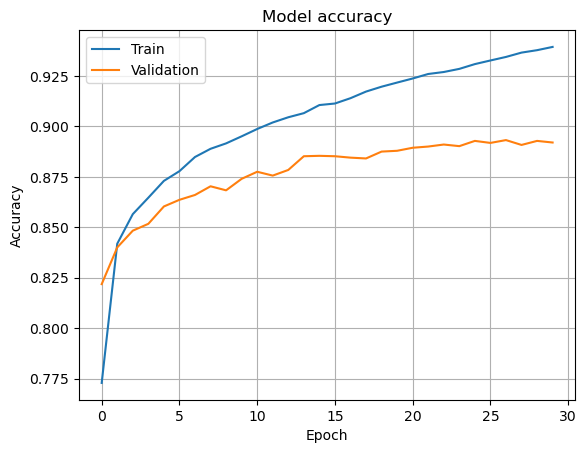

In [13]:
# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

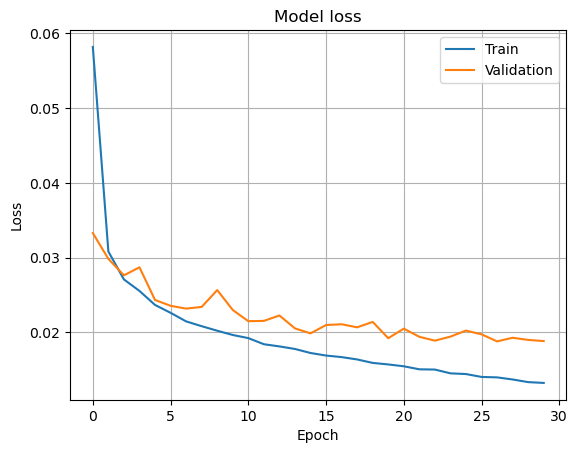

In [14]:
# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()